In [ ]:
!pip install -q pyomo

In [ ]:
from pyomo.environ import * 

In [ ]:
import numpy as np

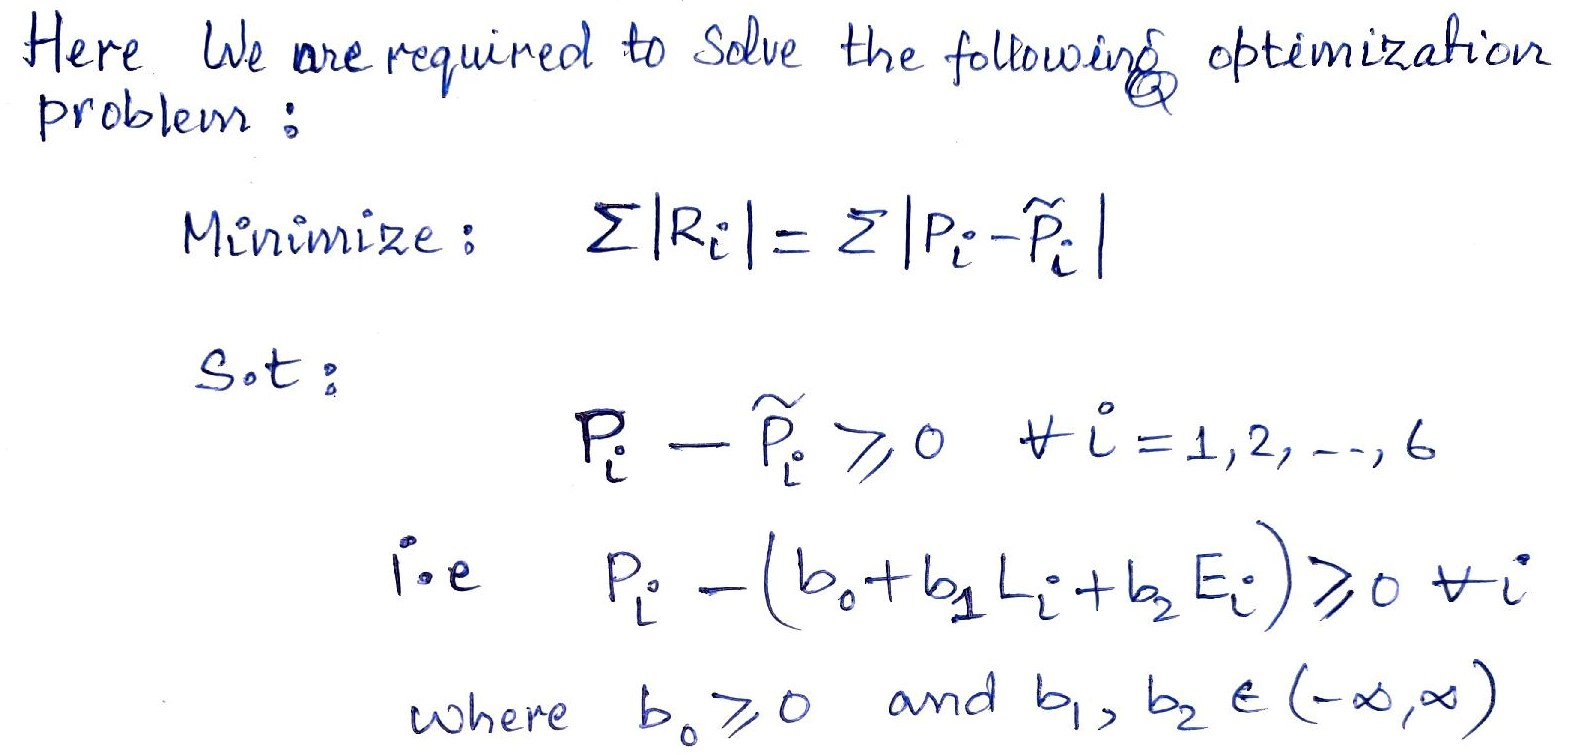

**Clearly**, this is a non linear problem .
it can be reduced to a linear programing problem by assuming: \
$\text{APPROACH 1:}$\
$ e_{i} = |R_{i}| >= 0$ \
$ \text{then objective function is:}$\
$\text{Minimize:}$
$\text{    }\sum_{i} e_{i}$ \
$\text{and the additional constraints are :}$ \
$ e_{i} >= R_{i} = P_{i}-(b_{o}+b_{1}L_{i}+b_{2}E_{i})$ \
$ e_{i} >= -R_{i} = -P_{i}+(b_{o}+b_{1}L_{i}+b_{2}E_{i})$ \
for i= 1,2,...,6 



In [ ]:
coef = np.loadtxt('lab6_Ex3_coef.txt', delimiter=',')

In [ ]:
print(coef.shape)
print('Num rows:',coef.shape[0])
print('Num cols:',coef.shape[1])

(19, 10)
Num rows: 19
Num cols: 10


In [ ]:
model = ConcreteModel()

In [ ]:
M = coef.shape[0]-1
N = coef.shape[1]-1
print(M,N)

18 9


In [ ]:
obj_coef = coef[0,:-1]
print(obj_coef.shape)
print(obj_coef)

(9,)
[0. 0. 0. 1. 1. 1. 1. 1. 1.]


In [ ]:
constr_coef = coef[1:,:-1]
print(constr_coef.shape)
print(constr_coef)

(18, 9)
[[ 1.0e+00  1.8e+03  2.5e+02  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00
   0.0e+00]
 [ 1.0e+00  2.8e+03  4.0e+02  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00
   0.0e+00]
 [ 1.0e+00  3.5e+03  4.5e+02  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00
   0.0e+00]
 [ 1.0e+00  8.0e+02  1.0e+02  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00
   0.0e+00]
 [ 1.0e+00  7.0e+02  2.0e+02  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00
   0.0e+00]
 [ 1.0e+00  5.0e+02  5.0e+01  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00
   0.0e+00]
 [-1.0e+00 -1.8e+03 -2.5e+02 -1.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00
   0.0e+00]
 [-1.0e+00 -2.8e+03 -4.0e+02  0.0e+00 -1.0e+00  0.0e+00  0.0e+00  0.0e+00
   0.0e+00]
 [-1.0e+00 -3.5e+03 -4.5e+02  0.0e+00  0.0e+00 -1.0e+00  0.0e+00  0.0e+00
   0.0e+00]
 [-1.0e+00 -8.0e+02 -1.0e+02  0.0e+00  0.0e+00  0.0e+00 -1.0e+00  0.0e+00
   0.0e+00]
 [-1.0e+00 -7.0e+02 -2.0e+02  0.0e+00  0.0e+00  0.0e+00  0.0e+00 -1.0e+00
   0.0e+00]
 [-1.0e+00 -5.0e+02 -5.0e+01  0.0e+00  0.0e+00

In [ ]:
constr_rhs = coef[1:,-1]
print(constr_rhs.shape)
print(constr_rhs)

(18,)
[ 175000.  150000.  125000.   90000.   80000.  120000. -175000. -150000.
 -125000.  -90000.  -80000. -120000.  175000.  150000.  125000.   90000.
   80000.  120000.]


In [ ]:
col_indices_b = np.arange(3)
print(col_indices_b)
model.b = Var(col_indices_b,domain=NonNegativeReals) 

[0 1 2]


In [ ]:
col_indices_e = np.arange(6)
print(col_indices_e)
model.e = Var(col_indices_e,domain=NonNegativeReals)

[0 1 2 3 4 5]


In [ ]:
row_indices = np.arange(M)
print(row_indices)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [ ]:
model.constraints = ConstraintList()

In [ ]:
for i in row_indices:
  model.constraints.add(summation(constr_coef[i][0:3],model.b) + summation(constr_coef[i][3:N],model.e)  <= constr_rhs[i])

In [ ]:

model.objective = Objective(expr = summation(obj_coef[3:N],model.e), sense=minimize)

In [ ]:
model.pprint()

3 Set Declarations
    b_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   18 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}
    e_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {0, 1, 2, 3, 4, 5}

2 Var Declarations
    b : Size=3, Index=b_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :  None : False :  True : NonNegativeReals
          1 :     0 :  None :  None : False :  True : NonNegativeReals
          2 :     0 :  None :  None : False :  True : NonNegativeReals
    e : Size=6, Index=e_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :  None : False :  True : Non

In [ ]:
!apt-get install -y -qq coinor-cbc

In [ ]:
opt_cbc = SolverFactory('cbc')

In [ ]:
result = opt_cbc.solve(model)
print(result)


Problem: 
- Name: unknown
  Lower bound: 165178.5714
  Upper bound: 165178.5714
  Number of objectives: 1
  Number of constraints: 19
  Number of variables: 10
  Number of nonzeros: 6
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
    Black box: 
      Number of iterations: 8
  Error rc: 0
  Time: 0.02496194839477539
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



**APPROACH 2:** \
Let us assume that \
$|R_{i}| = x_{i}+y_{i}$ \
and
$R_{i} = x_{i}-y_{i} \ ,\ $ \
then objective function is represented as: \
$ Minimum: \sum_{i} (x_{i}-y_{i}) \ $  \
and the additional constraints are: \
$P_{i}-(b_{0}+b_{1}L_{i}+b_{2}E_{i})-x_{i}+y_{i} = 0 ,$ \
$P_{i}-(b_{0}+b_{1}L_{i}+b_{2}E_{i})-x_{i}-y_{i} <= 0 ,$ \
$-P_{i}+(b_{0}+b_{1}L_{i}+b_{2}E_{i})-x_{i}-y_{i} <= 0 ,$ \
where $x_{i},y_{i} >= 0$



After solving this we will get the same solution as we got in the **Approach 1**

In [ ]:
print("5.ANSWER :")
print('Solver status:', result.solver.status)
print('Solver termination condition:',result.solver.termination_condition)

# display solution
print('\nObjective = ', model.objective())

print('\nDecision Variables')
for i in range(3):
  print('b[',i,'] = ', model.b[i].value)
for j in range(6):
  print('e[',i,'] = ', model.e[j].value)
print('\n Constraints')
model.constraints.display()

5.ANSWER :
Solver status: ok
Solver termination condition: optimal

Objective =  165178.5721

Decision Variables
b[ 0 ] =  68750.0
b[ 1 ] =  16.071429
b[ 2 ] =  0.0
e[ 2 ] =  77321.429
e[ 2 ] =  36250.0
e[ 2 ] =  0.0
e[ 2 ] =  8392.8571
e[ 2 ] =  0.0
e[ 2 ] =  43214.286

 Constraints
constraints : Size=18
    Key : Lower : Body                : Upper
      1 :  None :          97678.5722 :  175000.0
      2 :  None :         113750.0012 :  150000.0
      3 :  None :  125000.00149999998 :  125000.0
      4 :  None :   81607.14319999999 :   90000.0
      5 :  None :          80000.0003 :   80000.0
      6 :  None :          76785.7145 :  120000.0
      7 :  None :        -175000.0012 : -175000.0
      8 :  None :        -150000.0012 : -150000.0
      9 :  None : -125000.00149999998 : -125000.0
     10 :  None :  -90000.00029999999 :  -90000.0
     11 :  None :         -80000.0003 :  -80000.0
     12 :  None :        -120000.0005 : -120000.0
     13 :  None :   20357.14319999999 :  175000